Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

Data :
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
Dir = "/content/drive/MyDrive/Flowers"
types = ["daisy","dandelion","rose","sunflower","tulip"]
data = []
for typ in types:
    path = os.path.join(Dir,typ)
    label = types.index(typ)
    for image in os.listdir(path):
        try:
            image_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(image_array, (320,240))
            data.append([resized_array,label])
        except:
            pass

In [ ]:
random.shuffle(data)

In [ ]:
Input = []
Target = []
for features,labels in data:
    Input.append(features)
    Target.append(labels)

2

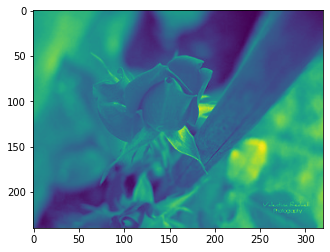

In [ ]:
plt.imshow(Input[0])
Target[0]

In [ ]:
Input = np.array(Input).reshape(4323,320*240)/255
Target = to_categorical(np.array(Target))

In [ ]:
X_train = Input[:2542]
Y_train = Target[:2542]
X_test = Input[2542:]
Y_test = Target[2542:]

In [ ]:
model = Sequential()
model.add(layers.Dense(1024,activation = "relu",input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8,activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5,activation = "softmax"))

In [ ]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
80/80 [==============================] - 7s 39ms/step - loss: 16.5208 - accuracy: 0.1884
Epoch 2/10
80/80 [==============================] - 3s 40ms/step - loss: 1.9012 - accuracy: 0.2129
Epoch 3/10
80/80 [==============================] - 3s 39ms/step - loss: 1.6504 - accuracy: 0.2159
Epoch 4/10
80/80 [==============================] - 3s 39ms/step - loss: 1.6170 - accuracy: 0.2260
Epoch 5/10
80/80 [==============================] - 3s 40ms/step - loss: 1.6050 - accuracy: 0.2531
Epoch 6/10
80/80 [==============================] - 3s 39ms/step - loss: 1.6028 - accuracy: 0.2526
Epoch 7/10
80/80 [==============================] - 3s 39ms/step - loss: 1.5985 - accuracy: 0.2610
Epoch 8/10
80/80 [==============================] - 3s 39ms/step - loss: 1.6006 - accuracy: 0.2521
Epoch 9/10
80/80 [==============================] - 3s 39ms/step - loss: 1.5997 - accuracy: 0.2464
Epoch 10/10
80/80 [==============================] - 3s 39ms/step - loss: 1.6008 - accuracy: 0.2527


In [ ]:
model.evaluate(X_test,Y_test)

56/56 [==============================] - 1s 8ms/step - loss: 1.6005 - accuracy: 0.2392


[1.6004607677459717, 0.239191472530365]

In [ ]:
model.predict(X_test)

array([[0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473],
       [0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473],
       [0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473],
       ...,
       [0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473],
       [0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473],
       [0.18191564, 0.23470144, 0.19591329, 0.16389489, 0.22357473]],
      dtype=float32)